In [110]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
import seaborn as sns
from itertools import product
import scipy.stats as stats
import re
import itertools
from scipy.stats import norm
from Step2.preprocessing.BA_params import *
from Step2.preprocessing.load_train_param import *
from Step2.preprocessing.filters import *
from Step2.LR.lr import *
from Step2.LR.trials import *
from Step2.LR.llr_prediction import *
from Step2.LR.performance import cllr, min_cllr
from sklearn.metrics.pairwise import cosine_similarity
import shap
import pickle

In [111]:
path="tp_jef/vec_vox2.txt.new"
#Load parameters
typ_path="data/typ_clean.txt"
dout_path="data/dout_clean.txt"

In [112]:
df = pd.read_csv(path)
n = len(eval(df.at[0, 'vector']))
BA = ['BA' + str(i) for i in range(n)]
df

utterance  \
0      id00032-5fmuA-cbnZA-00001   
1      id00032-5fmuA-cbnZA-00003   
2      id00032-5fmuA-cbnZA-00004   
3      id00032-5fmuA-cbnZA-00006   
4      id00032-5fmuA-cbnZA-00008   
...                          ...   
44825  id09271-z-gyjtOnwA8-00121   
44826  id09271-z-gyjtOnwA8-00122   
44827  id09271-z-gyjtOnwA8-00123   
44828  id09271-z-gyjtOnwA8-00124   
44829  id09271-z-gyjtOnwA8-00126   

                                                  vector  
0      [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1      [0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...  
2      [0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...  
3      [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4      [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
...                                                  ...  
44825  [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...  
44826  [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...  
44827  [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...  
44828  [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...  
44829  [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...  

[44830 rows x 2 columns]

In [113]:
n

256

In [114]:
BA

['BA0',
 'BA1',
 'BA2',
 'BA3',
 'BA4',
 'BA5',
 'BA6',
 'BA7',
 'BA8',
 'BA9',
 'BA10',
 'BA11',
 'BA12',
 'BA13',
 'BA14',
 'BA15',
 'BA16',
 'BA17',
 'BA18',
 'BA19',
 'BA20',
 'BA21',
 'BA22',
 'BA23',
 'BA24',
 'BA25',
 'BA26',
 'BA27',
 'BA28',
 'BA29',
 'BA30',
 'BA31',
 'BA32',
 'BA33',
 'BA34',
 'BA35',
 'BA36',
 'BA37',
 'BA38',
 'BA39',
 'BA40',
 'BA41',
 'BA42',
 'BA43',
 'BA44',
 'BA45',
 'BA46',
 'BA47',
 'BA48',
 'BA49',
 'BA50',
 'BA51',
 'BA52',
 'BA53',
 'BA54',
 'BA55',
 'BA56',
 'BA57',
 'BA58',
 'BA59',
 'BA60',
 'BA61',
 'BA62',
 'BA63',
 'BA64',
 'BA65',
 'BA66',
 'BA67',
 'BA68',
 'BA69',
 'BA70',
 'BA71',
 'BA72',
 'BA73',
 'BA74',
 'BA75',
 'BA76',
 'BA77',
 'BA78',
 'BA79',
 'BA80',
 'BA81',
 'BA82',
 'BA83',
 'BA84',
 'BA85',
 'BA86',
 'BA87',
 'BA88',
 'BA89',
 'BA90',
 'BA91',
 'BA92',
 'BA93',
 'BA94',
 'BA95',
 'BA96',
 'BA97',
 'BA98',
 'BA99',
 'BA100',
 'BA101',
 'BA102',
 'BA103',
 'BA104',
 'BA105',
 'BA106',
 'BA107',
 'BA108',
 'BA109',
 'BA110',


In [115]:
xvectors = [eval(x) for x in df['vector'].values]
df_ba = pd.DataFrame(xvectors, columns=BA)
df_ba=todelete(df_ba,BA) # To delete attribute that doesn't appear in any utterance
df_ba

BA0  BA1  BA2  BA3  BA4  BA5  BA6  BA7  BA8  BA9  ...  BA245  BA247  \
0      0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    1.0    1.0   
1      0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    1.0   
2      0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3      0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    1.0   
4      0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
44825  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...    0.0    1.0   
44826  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...    0.0    1.0   
44827  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...    0.0    1.0   
44828  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
44829  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...    0.0    1.0   

       BA248  BA249  BA250  BA251  BA252  BA253  BA254  BA255  
0        1.0    0.0    0.0    0.0    1.0    0.0    0.0    1.0  
1        1.0    0.0    0.0    1.0    1.0    0.0    0.0    1.0  
2        1.0    0.0    0.0    0.0    1.0    0.0    0.0    1.0  
3        1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
4        1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
...      ...    ...    ...    ...    ...    ...    ...    ...  
44825    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0  
44826    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
44827    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
44828    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
44829    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[44830 rows x 233 columns]

In [116]:
len(df_ba.columns) # before we had 256 attributes and after deletion we now have 233 => (256 - 233) attributes removed

233

In [117]:
typ,dout=load_filter_soft(typ_path,dout_path)

In [118]:
typ

{'BA0': 3e-06,
 'BA1': 3e-06,
 'BA2': 0.654956,
 'BA3': 0.919596,
 'BA4': 0.747972,
 'BA5': 0.408034,
 'BA6': 3e-06,
 'BA7': 3e-06,
 'BA8': 0.59586,
 'BA9': 0.156562,
 'BA10': 0.870665,
 'BA11': 0.76831,
 'BA12': 0.684447,
 'BA13': 0.713459,
 'BA14': 5e-06,
 'BA15': 0.614027,
 'BA16': 0.879405,
 'BA17': 0.802016,
 'BA18': 0.699994,
 'BA19': 0.643663,
 'BA20': 0.269686,
 'BA21': 6e-06,
 'BA22': 0.64527,
 'BA23': 0.545949,
 'BA24': 0.543732,
 'BA25': 0.219734,
 'BA26': 0.694699,
 'BA27': 0.764804,
 'BA28': 0.572145,
 'BA29': 0.510545,
 'BA30': 0.528341,
 'BA31': 0.968222,
 'BA32': 0.729331,
 'BA33': 0.420274,
 'BA34': 0.770945,
 'BA35': 0.886931,
 'BA36': 3e-06,
 'BA37': 3e-06,
 'BA38': 0.731612,
 'BA39': 1e-06,
 'BA40': 0.876278,
 'BA41': 0.529555,
 'BA42': 0.525918,
 'BA43': 0.812209,
 'BA44': 0.787144,
 'BA45': 0.774171,
 'BA46': 0.694978,
 'BA47': 0.746529,
 'BA48': 0.792185,
 'BA49': 3e-06,
 'BA50': 0.754334,
 'BA51': 0.410382,
 'BA52': 0.678661,
 'BA53': 0.425918,
 'BA54': 0.257014

In [119]:
dout

{'BA0': 0.969448,
 'BA1': 0.969448,
 'BA2': 0.72574,
 'BA3': 0.574891,
 'BA4': 0.642484,
 'BA5': 0.616046,
 'BA6': 0.967685,
 'BA7': 0.967685,
 'BA8': 0.751359,
 'BA9': 0.458987,
 'BA10': 0.654152,
 'BA11': 0.719187,
 'BA12': 0.677665,
 'BA13': 0.717909,
 'BA14': 0.973563,
 'BA15': 0.705966,
 'BA16': 0.600044,
 'BA17': 0.776687,
 'BA18': 0.70582,
 'BA19': 0.709839,
 'BA20': 0.755719,
 'BA21': 0.974559,
 'BA22': 0.745822,
 'BA23': 0.749883,
 'BA24': 0.743002,
 'BA25': 0.790866,
 'BA26': 0.640149,
 'BA27': 0.728986,
 'BA28': 0.659497,
 'BA29': 0.700637,
 'BA30': 0.78394,
 'BA31': 0.472595,
 'BA32': 0.707593,
 'BA33': 0.779325,
 'BA34': 0.694898,
 'BA35': 0.675852,
 'BA36': 0.967685,
 'BA37': 0.969448,
 'BA38': 0.707175,
 'BA39': 0.974609,
 'BA40': 0.591841,
 'BA41': 0.730295,
 'BA42': 0.628742,
 'BA43': 0.624437,
 'BA44': 0.660447,
 'BA45': 0.717179,
 'BA46': 0.647957,
 'BA47': 0.665751,
 'BA48': 0.662413,
 'BA49': 0.967685,
 'BA50': 0.689016,
 'BA51': 0.749333,
 'BA52': 0.675515,
 'BA53

In [120]:
len(list(typ.keys()))

256

In [121]:
typ_keys = typ.keys()
df_ba_columns = list(df_ba.columns)
# Pour ne considérer les attributs apparaissants dans des audio
df_ba_new_columns = [k for k in typ_keys if k in df_ba_columns]

In [122]:
df_ba_new_columns

['BA0',
 'BA1',
 'BA2',
 'BA3',
 'BA4',
 'BA5',
 'BA6',
 'BA7',
 'BA8',
 'BA9',
 'BA10',
 'BA11',
 'BA12',
 'BA13',
 'BA14',
 'BA15',
 'BA16',
 'BA17',
 'BA18',
 'BA19',
 'BA20',
 'BA21',
 'BA22',
 'BA23',
 'BA24',
 'BA25',
 'BA26',
 'BA27',
 'BA28',
 'BA29',
 'BA30',
 'BA31',
 'BA32',
 'BA33',
 'BA34',
 'BA35',
 'BA36',
 'BA38',
 'BA40',
 'BA41',
 'BA42',
 'BA43',
 'BA44',
 'BA45',
 'BA46',
 'BA47',
 'BA48',
 'BA49',
 'BA50',
 'BA51',
 'BA52',
 'BA53',
 'BA54',
 'BA55',
 'BA56',
 'BA57',
 'BA58',
 'BA59',
 'BA60',
 'BA61',
 'BA62',
 'BA65',
 'BA66',
 'BA67',
 'BA68',
 'BA69',
 'BA70',
 'BA71',
 'BA72',
 'BA73',
 'BA74',
 'BA75',
 'BA76',
 'BA77',
 'BA78',
 'BA79',
 'BA80',
 'BA81',
 'BA82',
 'BA83',
 'BA84',
 'BA85',
 'BA87',
 'BA88',
 'BA90',
 'BA91',
 'BA93',
 'BA94',
 'BA95',
 'BA96',
 'BA97',
 'BA98',
 'BA100',
 'BA101',
 'BA102',
 'BA103',
 'BA104',
 'BA105',
 'BA106',
 'BA107',
 'BA108',
 'BA109',
 'BA110',
 'BA111',
 'BA112',
 'BA113',
 'BA114',
 'BA115',
 'BA116',
 'BA117',
 '

In [123]:
len(df_ba_new_columns)

233

In [124]:
df_ba=df_ba[df_ba_new_columns]

In [125]:
# BA_test=list(typ.keys())
BA_test = df_ba_new_columns

In [126]:
BA_test

['BA0',
 'BA1',
 'BA2',
 'BA3',
 'BA4',
 'BA5',
 'BA6',
 'BA7',
 'BA8',
 'BA9',
 'BA10',
 'BA11',
 'BA12',
 'BA13',
 'BA14',
 'BA15',
 'BA16',
 'BA17',
 'BA18',
 'BA19',
 'BA20',
 'BA21',
 'BA22',
 'BA23',
 'BA24',
 'BA25',
 'BA26',
 'BA27',
 'BA28',
 'BA29',
 'BA30',
 'BA31',
 'BA32',
 'BA33',
 'BA34',
 'BA35',
 'BA36',
 'BA38',
 'BA40',
 'BA41',
 'BA42',
 'BA43',
 'BA44',
 'BA45',
 'BA46',
 'BA47',
 'BA48',
 'BA49',
 'BA50',
 'BA51',
 'BA52',
 'BA53',
 'BA54',
 'BA55',
 'BA56',
 'BA57',
 'BA58',
 'BA59',
 'BA60',
 'BA61',
 'BA62',
 'BA65',
 'BA66',
 'BA67',
 'BA68',
 'BA69',
 'BA70',
 'BA71',
 'BA72',
 'BA73',
 'BA74',
 'BA75',
 'BA76',
 'BA77',
 'BA78',
 'BA79',
 'BA80',
 'BA81',
 'BA82',
 'BA83',
 'BA84',
 'BA85',
 'BA87',
 'BA88',
 'BA90',
 'BA91',
 'BA93',
 'BA94',
 'BA95',
 'BA96',
 'BA97',
 'BA98',
 'BA100',
 'BA101',
 'BA102',
 'BA103',
 'BA104',
 'BA105',
 'BA106',
 'BA107',
 'BA108',
 'BA109',
 'BA110',
 'BA111',
 'BA112',
 'BA113',
 'BA114',
 'BA115',
 'BA116',
 'BA117',
 '

In [127]:
utt={}
for (idx,row) in df_ba.iterrows():
    utt[f"utt{idx}"]=dict(row)

In [128]:
utt

{'utt0': {'BA0': 0.0,
  'BA1': 0.0,
  'BA2': 1.0,
  'BA3': 1.0,
  'BA4': 0.0,
  'BA5': 0.0,
  'BA6': 0.0,
  'BA7': 0.0,
  'BA8': 0.0,
  'BA9': 0.0,
  'BA10': 0.0,
  'BA11': 0.0,
  'BA12': 1.0,
  'BA13': 0.0,
  'BA14': 0.0,
  'BA15': 0.0,
  'BA16': 1.0,
  'BA17': 0.0,
  'BA18': 0.0,
  'BA19': 1.0,
  'BA20': 1.0,
  'BA21': 0.0,
  'BA22': 0.0,
  'BA23': 0.0,
  'BA24': 0.0,
  'BA25': 0.0,
  'BA26': 1.0,
  'BA27': 0.0,
  'BA28': 0.0,
  'BA29': 0.0,
  'BA30': 0.0,
  'BA31': 1.0,
  'BA32': 0.0,
  'BA33': 0.0,
  'BA34': 0.0,
  'BA35': 1.0,
  'BA36': 0.0,
  'BA38': 0.0,
  'BA40': 0.0,
  'BA41': 0.0,
  'BA42': 0.0,
  'BA43': 0.0,
  'BA44': 0.0,
  'BA45': 0.0,
  'BA46': 1.0,
  'BA47': 0.0,
  'BA48': 0.0,
  'BA49': 0.0,
  'BA50': 0.0,
  'BA51': 0.0,
  'BA52': 0.0,
  'BA53': 0.0,
  'BA54': 0.0,
  'BA55': 0.0,
  'BA56': 0.0,
  'BA57': 0.0,
  'BA58': 1.0,
  'BA59': 1.0,
  'BA60': 0.0,
  'BA61': 0.0,
  'BA62': 1.0,
  'BA65': 0.0,
  'BA66': 0.0,
  'BA67': 0.0,
  'BA68': 0.0,
  'BA69': 1.0,
  'BA70': 1.

In [129]:
non,tar= load_trials()

In [130]:
non

[('utt121636', 'utt47785'),
 ('utt131899', 'utt95034'),
 ('utt120210', 'utt109212'),
 ('utt21752', 'utt108628'),
 ('utt152202', 'utt109048'),
 ('utt146754', 'utt66210'),
 ('utt49382', 'utt88482'),
 ('utt20257', 'utt29053'),
 ('utt919', 'utt116208'),
 ('utt59843', 'utt8937'),
 ('utt26344', 'utt92795'),
 ('utt50323', 'utt44068'),
 ('utt7181', 'utt20253'),
 ('utt26483', 'utt64222'),
 ('utt79410', 'utt96601'),
 ('utt88489', 'utt34099'),
 ('utt67442', 'utt58585'),
 ('utt18257', 'utt13689'),
 ('utt96754', 'utt152758'),
 ('utt20765', 'utt60164'),
 ('utt135630', 'utt29955'),
 ('utt82923', 'utt18737'),
 ('utt14483', 'utt2201'),
 ('utt23889', 'utt16668'),
 ('utt123395', 'utt41409'),
 ('utt26484', 'utt32722'),
 ('utt30757', 'utt50325'),
 ('utt143925', 'utt67439'),
 ('utt127068', 'utt102296'),
 ('utt78203', 'utt93093'),
 ('utt104964', 'utt64066'),
 ('utt89190', 'utt758'),
 ('utt118921', 'utt38122'),
 ('utt104618', 'utt140725'),
 ('utt34196', 'utt43478'),
 ('utt114989', 'utt147112'),
 ('utt138874',

In [131]:
type(non)

list

In [132]:
tar

[('utt116816', 'utt116817'),
 ('utt33853', 'utt33858'),
 ('utt68871', 'utt68874'),
 ('utt5540', 'utt5541'),
 ('utt25104', 'utt25113'),
 ('utt153164', 'utt153169'),
 ('utt77325', 'utt77328'),
 ('utt3215', 'utt3216'),
 ('utt73523', 'utt73526'),
 ('utt81856', 'utt81859'),
 ('utt135627', 'utt135630'),
 ('utt80894', 'utt80898'),
 ('utt93897', 'utt93902'),
 ('utt150519', 'utt150526'),
 ('utt81261', 'utt81263'),
 ('utt65792', 'utt65799'),
 ('utt122299', 'utt122305'),
 ('utt142936', 'utt142937'),
 ('utt96934', 'utt96935'),
 ('utt140092', 'utt140098'),
 ('utt151320', 'utt151321'),
 ('utt39259', 'utt39261'),
 ('utt78260', 'utt78264'),
 ('utt127823', 'utt127826'),
 ('utt3420', 'utt3429'),
 ('utt8047', 'utt8053'),
 ('utt60753', 'utt60755'),
 ('utt60752', 'utt60757'),
 ('utt13988', 'utt13989'),
 ('utt80062', 'utt80063'),
 ('utt88568', 'utt88570'),
 ('utt11003', 'utt11011'),
 ('utt32037', 'utt32040'),
 ('utt10351', 'utt10354'),
 ('utt99512', 'utt99519'),
 ('utt149652', 'utt149659'),
 ('utt30820', 'u

In [133]:
utt_keys = list(utt.keys())

In [134]:
utt_keys

['utt0',
 'utt1',
 'utt2',
 'utt3',
 'utt4',
 'utt5',
 'utt6',
 'utt7',
 'utt8',
 'utt9',
 'utt10',
 'utt11',
 'utt12',
 'utt13',
 'utt14',
 'utt15',
 'utt16',
 'utt17',
 'utt18',
 'utt19',
 'utt20',
 'utt21',
 'utt22',
 'utt23',
 'utt24',
 'utt25',
 'utt26',
 'utt27',
 'utt28',
 'utt29',
 'utt30',
 'utt31',
 'utt32',
 'utt33',
 'utt34',
 'utt35',
 'utt36',
 'utt37',
 'utt38',
 'utt39',
 'utt40',
 'utt41',
 'utt42',
 'utt43',
 'utt44',
 'utt45',
 'utt46',
 'utt47',
 'utt48',
 'utt49',
 'utt50',
 'utt51',
 'utt52',
 'utt53',
 'utt54',
 'utt55',
 'utt56',
 'utt57',
 'utt58',
 'utt59',
 'utt60',
 'utt61',
 'utt62',
 'utt63',
 'utt64',
 'utt65',
 'utt66',
 'utt67',
 'utt68',
 'utt69',
 'utt70',
 'utt71',
 'utt72',
 'utt73',
 'utt74',
 'utt75',
 'utt76',
 'utt77',
 'utt78',
 'utt79',
 'utt80',
 'utt81',
 'utt82',
 'utt83',
 'utt84',
 'utt85',
 'utt86',
 'utt87',
 'utt88',
 'utt89',
 'utt90',
 'utt91',
 'utt92',
 'utt93',
 'utt94',
 'utt95',
 'utt96',
 'utt97',
 'utt98',
 'utt99',
 'utt100',

In [135]:
tar = [(x, y) for x, y in tar if x in utt_keys and y in utt_keys]

In [136]:
tar

[('utt33853', 'utt33858'),
 ('utt5540', 'utt5541'),
 ('utt25104', 'utt25113'),
 ('utt3215', 'utt3216'),
 ('utt39259', 'utt39261'),
 ('utt3420', 'utt3429'),
 ('utt8047', 'utt8053'),
 ('utt13988', 'utt13989'),
 ('utt11003', 'utt11011'),
 ('utt32037', 'utt32040'),
 ('utt10351', 'utt10354'),
 ('utt30820', 'utt30825'),
 ('utt19127', 'utt19128'),
 ('utt34947', 'utt34949'),
 ('utt21559', 'utt21564'),
 ('utt26483', 'utt26490'),
 ('utt39798', 'utt39800'),
 ('utt18447', 'utt18448'),
 ('utt40023', 'utt40029'),
 ('utt35178', 'utt35181'),
 ('utt35529', 'utt35532'),
 ('utt35350', 'utt35359'),
 ('utt27361', 'utt27363'),
 ('utt28004', 'utt28011'),
 ('utt23411', 'utt23420'),
 ('utt36449', 'utt36455'),
 ('utt26346', 'utt26353'),
 ('utt21558', 'utt21565'),
 ('utt28909', 'utt28914'),
 ('utt30182', 'utt30184'),
 ('utt15691', 'utt15692'),
 ('utt6852', 'utt6858'),
 ('utt35527', 'utt35534'),
 ('utt38047', 'utt38051'),
 ('utt33443', 'utt33452'),
 ('utt31130', 'utt31139'),
 ('utt5828', 'utt5829'),
 ('utt26585',

In [137]:
non = [(x, y) for x, y in non if x in utt_keys and y in utt_keys]

In [138]:
non

[('utt20257', 'utt29053'),
 ('utt7181', 'utt20253'),
 ('utt18257', 'utt13689'),
 ('utt14483', 'utt2201'),
 ('utt23889', 'utt16668'),
 ('utt26484', 'utt32722'),
 ('utt34196', 'utt43478'),
 ('utt3216', 'utt863'),
 ('utt23814', 'utt12347'),
 ('utt7450', 'utt15387'),
 ('utt30113', 'utt9728'),
 ('utt44323', 'utt19440'),
 ('utt7301', 'utt27865'),
 ('utt41758', 'utt4083'),
 ('utt14786', 'utt44825'),
 ('utt12298', 'utt22879'),
 ('utt39961', 'utt44328'),
 ('utt29049', 'utt43242'),
 ('utt5289', 'utt548'),
 ('utt27099', 'utt6258'),
 ('utt6260', 'utt6727'),
 ('utt11888', 'utt23590'),
 ('utt24350', 'utt19936'),
 ('utt6261', 'utt22812'),
 ('utt41269', 'utt21294'),
 ('utt20768', 'utt6'),
 ('utt20258', 'utt17510'),
 ('utt9200', 'utt15083'),
 ('utt37858', 'utt41273'),
 ('utt8155', 'utt14696'),
 ('utt16247', 'utt2201'),
 ('utt13501', 'utt44826'),
 ('utt43564', 'utt20642'),
 ('utt3793', 'utt22811'),
 ('utt35356', 'utt41275'),
 ('utt14269', 'utt6727'),
 ('utt33532', 'utt39584'),
 ('utt27947', 'utt40316'),

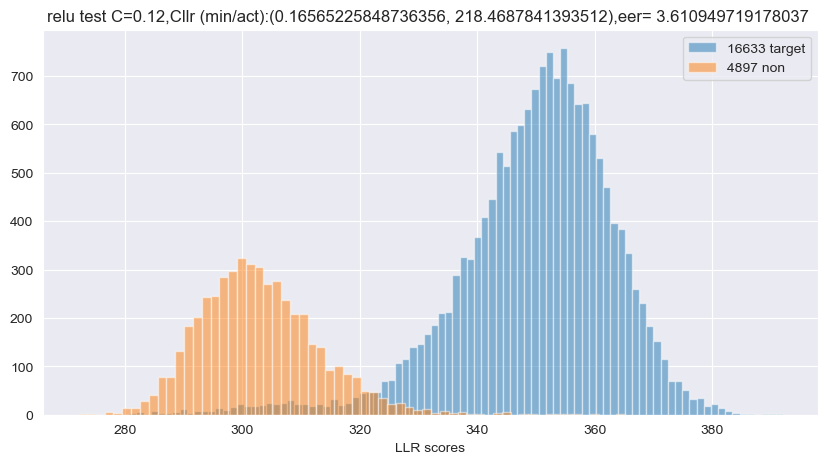

In [139]:
LLR_target,LLR_non,list_eer,list_cllr_min,list_cllr_act,list_Din=LR_framework(dout,typ,utt,tar,non,[0.12])
plt.show()

In [140]:
LLR_target, len(LLR_target)

([354.2699188564434,
  348.157527072388,
  356.0553849438866,
  353.06476602169465,
  345.91101794986037,
  347.0515010459178,
  338.1523281884364,
  361.0495087877508,
  345.42958662190057,
  342.54966150485603,
  348.8079481134339,
  348.58985251524376,
  358.82213951972466,
  349.9519956887129,
  356.4452930026179,
  349.28350873615807,
  331.1245490212948,
  344.0269691310937,
  335.8035325650971,
  364.74341464216144,
  356.1536307349745,
  342.48808023424124,
  359.8397518053515,
  346.35341487690124,
  336.58014169389713,
  336.23439941500743,
  342.46862108286683,
  358.94967304021185,
  350.86185383554766,
  364.1674398230291,
  363.73788695434615,
  363.6410839362451,
  347.62688154517303,
  347.64993970436547,
  317.84931998357297,
  345.92775488337276,
  362.20137157157444,
  343.3980031928745,
  341.14642539213463,
  344.0814305088384,
  369.89293312120174,
  325.42869390045246,
  315.081917380126,
  324.6407820551877,
  348.0478564257887,
  351.58149689093744,
  371.41612

In [141]:
LLR_non, len(LLR_non)

([295.01358067471796,
  293.43775104417875,
  288.42621496127305,
  289.133230590775,
  312.31449783227964,
  296.48302186370654,
  310.41659645304793,
  293.54564829882594,
  312.3024987774693,
  305.7585855188972,
  300.7962652915758,
  328.69597736891166,
  289.879389324087,
  286.65762136048727,
  299.2993008772449,
  303.6128818157201,
  293.9841319812321,
  290.18695003920686,
  294.2770538317803,
  300.2015568024141,
  296.9416491849489,
  292.0797904293747,
  310.77409312495433,
  292.3554052941283,
  307.70069057170275,
  302.2966443437473,
  310.71940649668886,
  297.98656690322514,
  293.80285782233386,
  316.13821757945567,
  320.21296250224304,
  306.2019574338662,
  300.0654340001443,
  298.5391027153179,
  298.2257892379055,
  295.1895835886226,
  302.27617849975974,
  296.14209087449495,
  322.16909824556376,
  297.16074402514374,
  297.78603479828564,
  302.0988444646152,
  296.96308834975616,
  306.5056255803726,
  304.05368303214715,
  290.3623157213602,
  305.747945

In [142]:
list_eer, len(list_eer)

([3.610949719178037], 1)

In [143]:
list_cllr_min, len(list_cllr_min)

([0.16565225848736356], 1)

In [144]:
utt_llr_tar,llr_type_tar=partial_lr_analysis(tar, BA_test,utt,typ, dout, prob_dropin=0.12)

In [145]:
utt_llr_non,llr_type_non=partial_lr_analysis(non,BA_test,utt,typ, dout, prob_dropin=0.12)

In [146]:
df_llr_tar=stats(utt_llr_tar,LLR_target)

In [147]:
df_llr_non=stats(utt_llr_non,LLR_non)

In [148]:
BA_tar={}
for ba in BA_test:
    ba_target=[]
    for i1,i2 in tar:
        ba_target.append((int(utt[i1][ba]),int(utt[i2][ba])))
    BA_tar[ba]=ba_target

In [149]:
#composition of each utterance in the non couples
BA_non={}
for ba in BA_test:
    ba_non=[]
    for i1,i2 in non:
        ba_non.append((int(utt[i1][ba]),int(utt[i2][ba])))
    BA_non[ba]=ba_non

In [150]:
df_BA_non=pd.DataFrame(BA_non)

In [151]:
df_non=pd.DataFrame(pd.Series(non),columns=["non"])

In [152]:
df_non=pd.concat([df_non,df_BA_non],axis=1)

In [153]:
df_BA=pd.DataFrame(BA_tar)

In [154]:
df_tar=pd.DataFrame(pd.Series(tar),columns=["target"])

In [155]:
df_tar=pd.concat([df_tar,df_BA],axis=1)

In [156]:
df_tar["scores"]=LLR_target

In [157]:
df_non["scores"]=LLR_non

In [158]:
BA_test

['BA0',
 'BA1',
 'BA2',
 'BA3',
 'BA4',
 'BA5',
 'BA6',
 'BA7',
 'BA8',
 'BA9',
 'BA10',
 'BA11',
 'BA12',
 'BA13',
 'BA14',
 'BA15',
 'BA16',
 'BA17',
 'BA18',
 'BA19',
 'BA20',
 'BA21',
 'BA22',
 'BA23',
 'BA24',
 'BA25',
 'BA26',
 'BA27',
 'BA28',
 'BA29',
 'BA30',
 'BA31',
 'BA32',
 'BA33',
 'BA34',
 'BA35',
 'BA36',
 'BA38',
 'BA40',
 'BA41',
 'BA42',
 'BA43',
 'BA44',
 'BA45',
 'BA46',
 'BA47',
 'BA48',
 'BA49',
 'BA50',
 'BA51',
 'BA52',
 'BA53',
 'BA54',
 'BA55',
 'BA56',
 'BA57',
 'BA58',
 'BA59',
 'BA60',
 'BA61',
 'BA62',
 'BA65',
 'BA66',
 'BA67',
 'BA68',
 'BA69',
 'BA70',
 'BA71',
 'BA72',
 'BA73',
 'BA74',
 'BA75',
 'BA76',
 'BA77',
 'BA78',
 'BA79',
 'BA80',
 'BA81',
 'BA82',
 'BA83',
 'BA84',
 'BA85',
 'BA87',
 'BA88',
 'BA90',
 'BA91',
 'BA93',
 'BA94',
 'BA95',
 'BA96',
 'BA97',
 'BA98',
 'BA100',
 'BA101',
 'BA102',
 'BA103',
 'BA104',
 'BA105',
 'BA106',
 'BA107',
 'BA108',
 'BA109',
 'BA110',
 'BA111',
 'BA112',
 'BA113',
 'BA114',
 'BA115',
 'BA116',
 'BA117',
 '

In [159]:
df_llr_tar

BA0        BA1       BA2       BA3       BA4       BA5  \
0      12.102011  12.102011 -0.050397 -0.469754 -0.152024  0.493579   
1      12.102011  12.102011 -0.050397 -0.291110 -0.129953  1.733612   
2      12.102011  12.102011 -0.050397  0.708449 -0.129953  0.493579   
3      12.102011  12.102011 -0.050397 -0.291110 -0.129953  0.493579   
4      12.102011  12.102011 -0.050397  0.708449  1.094977  0.493579   
...          ...        ...       ...       ...       ...       ...   
16628  12.102011  12.102011 -0.050397 -0.291110 -0.129953  0.411971   
16629  12.102011  12.102011 -0.050397  0.708449 -0.129953  0.493579   
16630  12.102011  12.102011 -0.050397 -0.291110 -0.152024  0.411971   
16631  12.102011  12.102011 -0.050397 -0.291110 -0.129953  0.493579   
16632  12.102011  12.102011 -0.050397 -0.291110 -0.129953  0.493579   

             BA6        BA7       BA8       BA9  ...     BA248      BA249  \
0      12.102965  12.102965  0.028336  2.434478  ... -0.200489  12.102965   
1      12.102965  12.102965  0.028336  1.562390  ...  1.049817  12.102965   
2      12.102965  12.102965  1.656733  1.562390  ... -0.200489  12.102965   
3      12.102965  12.102965  0.028336  1.562390  ... -2.095449  12.102965   
4      12.102965  12.102965  0.028336  1.562390  ... -0.200489  12.102965   
...          ...        ...       ...       ...  ...       ...        ...   
16628  12.102965  12.102965  0.028336  1.562390  ... -0.200489  12.102965   
16629  12.102965  12.102965  0.028336  2.434478  ... -0.200489  12.102965   
16630  12.102965  12.102965  0.028336  1.562390  ... -0.193657  12.102965   
16631  12.102965  12.102965  1.656733  1.562390  ... -0.200489  12.102965   
16632  12.102965  12.102965  0.028336  1.562390  ... -0.200489  12.102965   

          BA250     BA251     BA252     BA253     BA254     BA255  \
0     -0.236255 -2.096697 -0.018531  0.131199 -2.087739  0.035693   
1     -0.236255 -0.201385  1.226109  0.432548 -0.119540  0.035693   
2     -0.236255  0.994398 -0.018531  0.131199 -2.087739  0.035693   
3     -2.092284 -0.201385 -0.018531  0.432548 -0.119540  0.035693   
4     -0.236255 -0.201385 -0.018531  0.131199 -0.119540  1.763309   
...         ...       ...       ...       ...       ...       ...   
16628 -0.236255  0.994398  1.226109 -2.061077 -2.087739  0.035693   
16629 -0.236255 -2.096697 -0.018531  0.131199 -0.119540  0.035693   
16630 -0.236255 -0.201385 -0.018531  0.131199 -0.119540  1.763309   
16631 -2.092284 -0.201385  1.226109  0.131199 -0.110205  0.035693   
16632 -0.236255 -2.096697 -0.018531  0.131199 -0.119540  0.285936   

                     target      scores  
0      (utt33853, utt33858)  354.269919  
1        (utt5540, utt5541)  348.157527  
2      (utt25104, utt25113)  356.055385  
3        (utt3215, utt3216)  353.064766  
4      (utt39259, utt39261)  345.911018  
...                     ...         ...  
16628  (utt11110, utt11112)  354.855371  
16629    (utt1094, utt1095)  356.198514  
16630  (utt27099, utt27100)  345.067333  
16631  (utt37345, utt37354)  344.586466  
16632  (utt38114, utt38116)  343.486460  

[16633 rows x 235 columns]

In [178]:
BA_test

['BA0',
 'BA1',
 'BA2',
 'BA3',
 'BA4',
 'BA5',
 'BA6',
 'BA7',
 'BA8',
 'BA9',
 'BA10',
 'BA11',
 'BA12',
 'BA13',
 'BA14',
 'BA15',
 'BA16',
 'BA17',
 'BA18',
 'BA19',
 'BA20',
 'BA21',
 'BA22',
 'BA23',
 'BA24',
 'BA25',
 'BA26',
 'BA27',
 'BA28',
 'BA29',
 'BA30',
 'BA31',
 'BA32',
 'BA33',
 'BA34',
 'BA35',
 'BA36',
 'BA38',
 'BA40',
 'BA41',
 'BA42',
 'BA43',
 'BA44',
 'BA45',
 'BA46',
 'BA47',
 'BA48',
 'BA49',
 'BA50',
 'BA51',
 'BA52',
 'BA53',
 'BA54',
 'BA55',
 'BA56',
 'BA57',
 'BA58',
 'BA59',
 'BA60',
 'BA61',
 'BA62',
 'BA65',
 'BA66',
 'BA67',
 'BA68',
 'BA69',
 'BA70',
 'BA71',
 'BA72',
 'BA73',
 'BA74',
 'BA75',
 'BA76',
 'BA77',
 'BA78',
 'BA79',
 'BA80',
 'BA81',
 'BA82',
 'BA83',
 'BA84',
 'BA85',
 'BA87',
 'BA88',
 'BA90',
 'BA91',
 'BA93',
 'BA94',
 'BA95',
 'BA96',
 'BA97',
 'BA98',
 'BA100',
 'BA101',
 'BA102',
 'BA103',
 'BA104',
 'BA105',
 'BA106',
 'BA107',
 'BA108',
 'BA109',
 'BA110',
 'BA111',
 'BA112',
 'BA113',
 'BA114',
 'BA115',
 'BA116',
 'BA117',
 '

In [179]:
df_llr_tar['BA255']

0        0.035693
1        0.035693
2        0.035693
3        0.035693
4        1.763309
           ...   
16628    0.035693
16629    0.035693
16630    1.763309
16631    0.035693
16632    0.285936
Name: BA255, Length: 16633, dtype: float64

In [183]:
for x in BA_test:
    print(set(df_llr_tar[x]))

{12.102011053107994}
{12.102011053107994}
{-0.05039748834109668, -2.077976635895768, 0.102623766153991, 1.4648860860115467}
{-0.4697539855520956, -0.2911101479080691, 0.7084489531222262, -2.110568208030975}
{-0.15202363038319738, 1.0949766722795022, -0.12995347665211793, -2.089553410640137}
{0.49357914697401467, 1.7336115352812353, -2.0465783300528413, 0.41197113180466616}
{12.102964765151153}
{12.102964765151153}
{0.028336129058928454, 1.6567332985281336, 0.23187782669548257, -2.0705513070593806}
{1.07556978955806, 1.562389823396786, 2.434478097226922, -2.013554823243682}
{0.936277508457924, -0.2894797938918441, -0.28591754712947204, -2.10462163705718}
{-0.20593339366228464, 1.249711495311904, -0.06607189018349692, -2.0920669217593315}
{-0.06404383904161885, 1.284325139332668, -0.009958147412973864, -2.08166161715424}
{-0.13106559261400916, 1.3381016625185373, 0.006217848012549285, -2.0852735441121366}
{11.58896291275004}
{0.026522692456398496, 1.4881573835860702, 0.13952817657166572,

In [184]:
df_llr_tar[df_llr_tar['BA255']==0.2859355091044795]

BA0        BA1       BA2       BA3       BA4       BA5  \
25     12.102011  12.102011  1.464886 -0.469754 -0.152024  0.493579   
36     12.102011  12.102011 -0.050397 -2.110568 -0.152024  0.493579   
48     12.102011  12.102011 -0.050397 -0.291110 -0.129953  0.493579   
52     12.102011  12.102011 -0.050397  0.708449 -0.129953  0.493579   
69     12.102011  12.102011 -0.050397 -0.291110 -0.129953  0.493579   
...          ...        ...       ...       ...       ...       ...   
16534  12.102011  12.102011  1.464886  0.708449  1.094977  1.733612   
16541  12.102011  12.102011 -0.050397 -0.291110  1.094977  0.493579   
16580  12.102011  12.102011  1.464886  0.708449 -2.089553 -2.046578   
16584  12.102011  12.102011  1.464886 -0.291110 -0.129953  0.493579   
16632  12.102011  12.102011 -0.050397 -0.291110 -0.129953  0.493579   

             BA6        BA7       BA8       BA9  ...     BA248      BA249  \
25     12.102965  12.102965  0.028336  2.434478  ... -0.193657  12.102965   
36     12.102965  12.102965  0.028336  2.434478  ... -0.200489  12.102965   
48     12.102965  12.102965  0.028336  1.562390  ... -0.193657  12.102965   
52     12.102965  12.102965  0.028336  1.562390  ... -0.200489  12.102965   
69     12.102965  12.102965  1.656733  1.562390  ... -0.200489  12.102965   
...          ...        ...       ...       ...  ...       ...        ...   
16534  12.102965  12.102965  0.028336  1.562390  ... -2.095449  12.102965   
16541  12.102965  12.102965  1.656733  1.562390  ... -0.200489  12.102965   
16580  12.102965  12.102965  0.028336  1.562390  ...  1.049817  12.102965   
16584  12.102965  12.102965  0.028336  1.562390  ...  1.049817  12.102965   
16632  12.102965  12.102965  0.028336  1.562390  ... -0.200489  12.102965   

          BA250     BA251     BA252     BA253     BA254     BA255  \
25    -0.236255 -0.201385 -0.018531  0.131199  1.151360  0.285936   
36    -0.236255 -0.201385 -0.018531  0.131199 -0.119540  0.285936   
48    -0.007044 -0.201385 -0.018531  0.131199 -0.119540  0.285936   
52    -0.236255 -0.201385 -0.018531  0.131199 -0.119540  0.285936   
69    -2.092284 -0.201385 -2.079777  0.131199 -0.110205  0.285936   
...         ...       ...       ...       ...       ...       ...   
16534 -0.236255 -0.201385 -0.041814  0.131199 -0.119540  0.285936   
16541 -0.236255 -0.201385  1.226109  0.131199  1.151360  0.285936   
16580 -0.236255 -0.234154  1.226109  0.131199 -0.119540  0.285936   
16584 -2.092284 -0.201385  1.226109  0.131199 -0.119540  0.285936   
16632 -0.236255 -2.096697 -0.018531  0.131199 -0.119540  0.285936   

                     target      scores  
25     (utt36449, utt36455)  336.234399  
36       (utt5828, utt5829)  362.201372  
48     (utt38564, utt38569)  360.171997  
52     (utt38513, utt38518)  366.610550  
69     (utt37348, utt37352)  341.622484  
...                     ...         ...  
16534  (utt36632, utt36635)  347.282382  
16541  (utt33048, utt33051)  346.808289  
16580      (utt209, utt210)  355.021543  
16584  (utt25708, utt25716)  357.920985  
16632  (utt38114, utt38116)  343.486460  

[1064 rows x 235 columns]

In [185]:
df_llr_tar[df_llr_tar['BA255']==0.2859355091044795].index

Index([   25,    36,    48,    52,    69,    82,    90,    95,    96,   111,
       ...
       16498, 16507, 16522, 16526, 16529, 16534, 16541, 16580, 16584, 16632],
      dtype='int64', length=1064)

In [186]:
df_llr_tar[df_llr_tar['BA255']==0.2859355091044795].index[0]

25

In [187]:
df_tar

target     BA0     BA1     BA2     BA3     BA4     BA5  \
0      (utt33853, utt33858)  (0, 0)  (0, 0)  (0, 0)  (1, 0)  (1, 0)  (0, 0)   
1        (utt5540, utt5541)  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (1, 1)   
2      (utt25104, utt25113)  (0, 0)  (0, 0)  (0, 0)  (1, 1)  (0, 0)  (0, 0)   
3        (utt3215, utt3216)  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (0, 0)   
4      (utt39259, utt39261)  (0, 0)  (0, 0)  (0, 0)  (1, 1)  (1, 1)  (0, 0)   
...                     ...     ...     ...     ...     ...     ...     ...   
16628  (utt11110, utt11112)  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (1, 0)   
16629    (utt1094, utt1095)  (0, 0)  (0, 0)  (0, 0)  (1, 1)  (0, 0)  (0, 0)   
16630  (utt27099, utt27100)  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (1, 0)  (1, 0)   
16631  (utt37345, utt37354)  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (0, 0)   
16632  (utt38114, utt38116)  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (0, 0)   

          BA6     BA7     BA8  ...   BA247   BA248   BA249   BA250   BA251  \
0      (0, 0)  (0, 0)  (0, 0)  ...  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (0, 1)   
1      (0, 0)  (0, 0)  (0, 0)  ...  (0, 0)  (1, 1)  (0, 0)  (0, 0)  (0, 0)   
2      (0, 0)  (0, 0)  (1, 1)  ...  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (1, 1)   
3      (0, 0)  (0, 0)  (0, 0)  ...  (0, 1)  (0, 1)  (0, 0)  (0, 1)  (0, 0)   
4      (0, 0)  (0, 0)  (0, 0)  ...  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (0, 0)   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
16628  (0, 0)  (0, 0)  (0, 0)  ...  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (1, 1)   
16629  (0, 0)  (0, 0)  (0, 0)  ...  (0, 0)  (0, 0)  (0, 0)  (0, 0)  (0, 1)   
16630  (0, 0)  (0, 0)  (0, 0)  ...  (0, 0)  (1, 0)  (0, 0)  (0, 0)  (0, 0)   
16631  (0, 0)  (0, 0)  (1, 1)  ...  (0, 0)  (0, 0)  (0, 0)  (0, 1)  (0, 0)   
16632  (0, 0)  (0, 0)  (0, 0)  ...  (1, 1)  (0, 0)  (0, 0)  (0, 0)  (0, 1)   

        BA252   BA253   BA254   BA255      scores  
0      (0, 0)  (0, 0)  (0, 1)  (0, 0)  354.269919  
1      (1, 1)  (1, 0)  (0, 0)  (0, 0)  348.157527  
2      (0, 0)  (0, 0)  (0, 1)  (0, 0)  356.055385  
3      (0, 0)  (1, 0)  (0, 0)  (0, 0)  353.064766  
4      (0, 0)  (0, 0)  (0, 0)  (1, 1)  345.911018  
...       ...     ...     ...     ...         ...  
16628  (1, 1)  (0, 1)  (0, 1)  (0, 0)  354.855371  
16629  (0, 0)  (0, 0)  (0, 0)  (0, 0)  356.198514  
16630  (0, 0)  (0, 0)  (0, 0)  (1, 1)  345.067333  
16631  (1, 1)  (0, 0)  (1, 0)  (0, 0)  344.586466  
16632  (0, 0)  (0, 0)  (0, 0)  (1, 0)  343.486460  

[16633 rows x 235 columns]

In [160]:
scores_BA={}
for b in BA_test:
    scores_BA[b]={"00":0,"01":0,"10":0,"11":0}
    for i in set(df_llr_tar[b]):
        index=df_llr_tar[df_llr_tar[b]==i].index[0]
        if df_tar[b].loc[index]==(0, 0):
            scores_BA[b]["00"]=i
        elif df_tar[b].loc[index]==(1, 0):
            scores_BA[b]["10"]=i
        elif df_tar[b].loc[index]==(0, 1):
            scores_BA[b]["01"]=i
        else:
            scores_BA[b]["11"]=i

In [161]:
scores_BA

{'BA0': {'00': 12.102011053107994, '01': 0, '10': 0, '11': 0},
 'BA1': {'00': 12.102011053107994, '01': 0, '10': 0, '11': 0},
 'BA2': {'00': -0.05039748834109668,
  '01': -2.077976635895768,
  '10': 0.102623766153991,
  '11': 1.4648860860115467},
 'BA3': {'00': -0.2911101479080691,
  '01': -2.110568208030975,
  '10': -0.4697539855520956,
  '11': 0.7084489531222262},
 'BA4': {'00': -0.12995347665211793,
  '01': -2.089553410640137,
  '10': -0.15202363038319738,
  '11': 1.0949766722795022},
 'BA5': {'00': 0.49357914697401467,
  '01': -2.0465783300528413,
  '10': 0.41197113180466616,
  '11': 1.7336115352812353},
 'BA6': {'00': 12.102964765151153, '01': 0, '10': 0, '11': 0},
 'BA7': {'00': 12.102964765151153, '01': 0, '10': 0, '11': 0},
 'BA8': {'00': 0.028336129058928454,
  '01': -2.0705513070593806,
  '10': 0.23187782669548257,
  '11': 1.6567332985281336},
 'BA9': {'00': 1.562389823396786,
  '01': -2.013554823243682,
  '10': 1.07556978955806,
  '11': 2.434478097226922},
 'BA10': {'00': -0

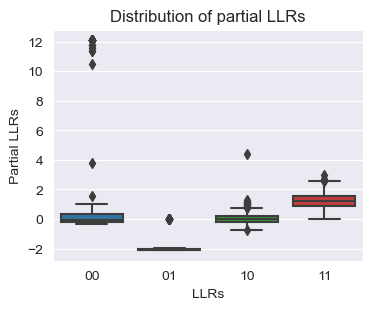

In [162]:
scores_df=pd.DataFrame.from_dict(scores_BA).T
plt.figure(figsize=(4,3))
sns.boxplot(data=scores_df, orient="v")
plt.title("Distribution of partial LLRs")
plt.xlabel("LLRs")
plt.ylabel("Partial LLRs")
plt.show()

In [163]:
scores_BA_df=pd.DataFrame()
scores_BA_df["BA"]=typ.keys()
scores_BA_df["Typicality"]=typ.values()
scores_BA_df["Dropout"]=dout.values()
scores_BA_df=scores_BA_df.sort_values("Typicality")

In [164]:
scores_BA_df=scores_BA_df.set_index('BA')
scores_BA_df=pd.concat([scores_BA_df,scores_df],axis=1)
scores_BA_df.reset_index(inplace=True)

In [165]:
tar=[i for i in list(df_tar["target"])]
non=[i for i in list(df_non["non"])]

In [166]:
def data_shape(tar,non,typ,dout,utt):
    U1=[]
    U2=[]
    for i in tar+non:
        c1=[]
        #print(utt[i[0]])
        for j in utt[i[0]].keys():
            c1.append(str(int(utt[i[0]][j]))+str(int(utt[i[1]][j])))
        U1.append(c1)
    test1=pd.DataFrame(U1,columns=BA_test)
    test1=test1.replace("01",1)
    test1=test1.replace("10",1)
    test1=test1.replace("00",2)
    test1=test1.replace("11",3)
    for i in test1.columns:
        test1[i] = test1[i].astype("category")
    return test1

In [167]:
def model(test):
    llr=[]
    test=pd.DataFrame(test,columns=BA_test)
    for idx,row in test.iterrows():
        lr=1
        for i in BA_test:
            #print(test.loc[idx][i])
            if test.loc[idx][i]!=0:
                if test.loc[idx][i]==3:
                    lr*=LR_11(typ[i],dout[i],prob_dropin)
                elif test.loc[idx][i]==2:
                    lr *= LR_00(typ[i], dout[i], prob_dropin)
                else:
                    lr *= LR_01(typ[i], prob_dropin)
        llr.append(np.log(lr))
    return np.array(llr)

In [168]:
def custom_masker(mask, x):
    return (x * mask).reshape(1,len(x))

In [169]:
prob_dropin=0.12
explainer = shap.Explainer(model,custom_masker)

In [170]:
test=data_shape(tar[:2],non[:2],typ,dout,utt)
shape=explainer(test)
test1=data_shape(tar,non,typ,dout,utt)

In [171]:
shape.values=np.concatenate((np.array(df_llr_tar[BA_test]),np.array(df_llr_non[BA_test])),axis=0)
shape.base_values=np.array([0.]*len(df_ba))
shape.data=np.array(test1)

## Local explanation

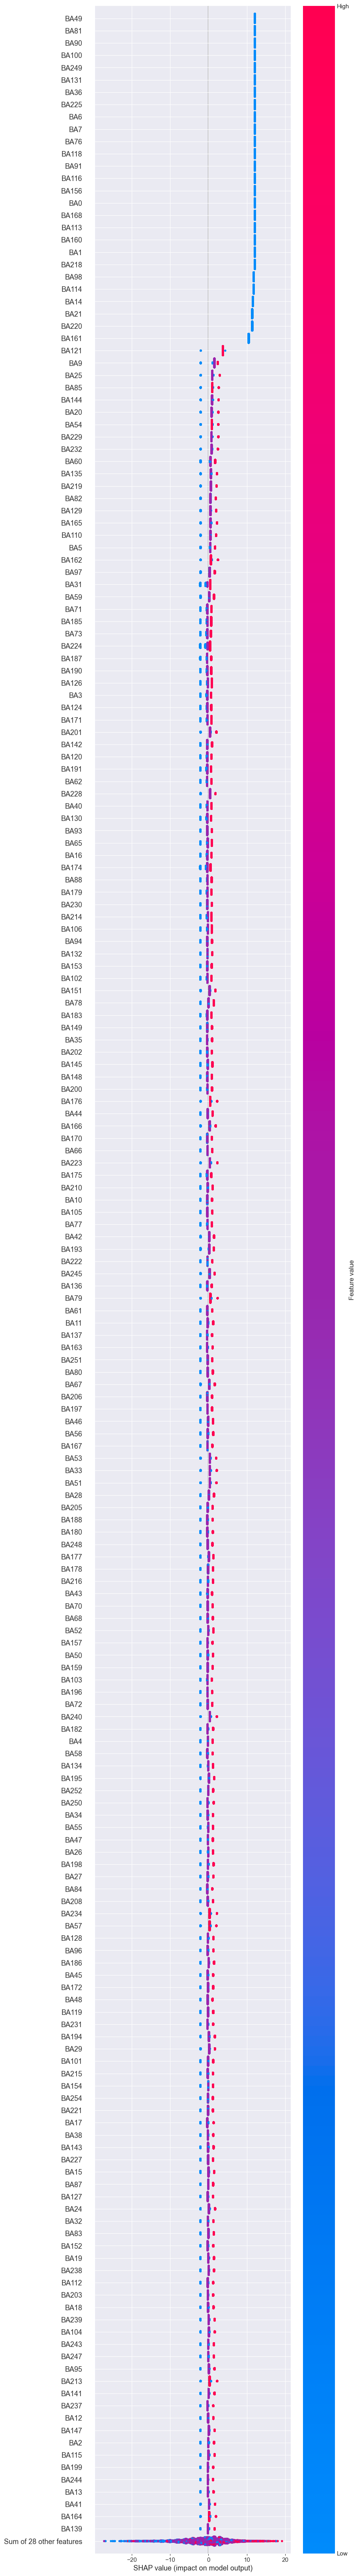

In [172]:
import shap
shap.initjs()
shap.plots.beeswarm(shape, 206) # 206

In [173]:
shap.initjs()
#prediction number 0
shap.plots.force(shape[0])

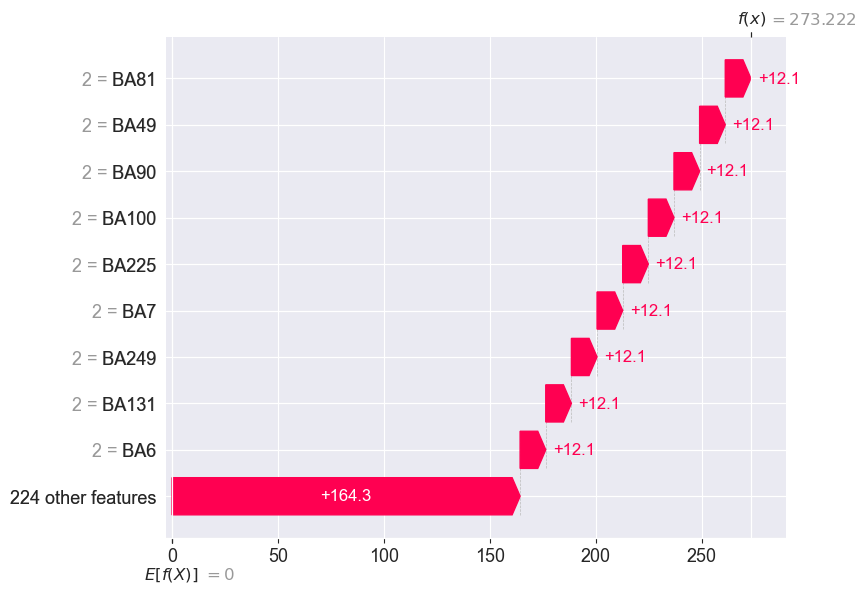

In [174]:
shap.plots.waterfall(shape[-21])

## Global explanation

In [175]:
contribution={}
for b in BA_test:
    contribution[b]=round((np.sum(np.abs(df_llr_tar[b]))+np.sum(np.abs(df_llr_non[b])))/(df_llr_non.shape[0]+df_llr_tar.shape[0]),3)
contribution_dict={k: (v/sum(contribution.values()))*100 for k, v in sorted(contribution.items(), key=lambda item: item[1],reverse=True)}
contribution_dict

{'BA6': 2.7214509608163233,
 'BA7': 2.7214509608163233,
 'BA36': 2.7214509608163233,
 'BA49': 2.7214509608163233,
 'BA81': 2.7214509608163233,
 'BA90': 2.7214509608163233,
 'BA100': 2.7214509608163233,
 'BA131': 2.7214509608163233,
 'BA225': 2.7214509608163233,
 'BA249': 2.7214509608163233,
 'BA0': 2.721226103263583,
 'BA1': 2.721226103263583,
 'BA76': 2.721226103263583,
 'BA91': 2.721226103263583,
 'BA113': 2.721226103263583,
 'BA116': 2.721226103263583,
 'BA118': 2.721226103263583,
 'BA156': 2.721226103263583,
 'BA160': 2.721226103263583,
 'BA168': 2.721226103263583,
 'BA218': 2.721226103263583,
 'BA98': 2.656242270521625,
 'BA114': 2.656242270521625,
 'BA14': 2.605874178707789,
 'BA21': 2.564725246556307,
 'BA220': 2.564725246556307,
 'BA161': 2.357856298035195,
 'BA121': 0.8495118342530009,
 'BA9': 0.3795595490256922,
 'BA25': 0.25881104320413023,
 'BA85': 0.2538641770438428,
 'BA144': 0.25184045906917973,
 'BA20': 0.23160327932254923,
 'BA54': 0.22935470379514578,
 'BA229': 0.2244

In [176]:
t=[]
d=[]
for i in contribution_dict.keys():
    t.append(typ[i])
    d.append(dout[i])
df_scores=pd.DataFrame([contribution_dict])
df_scores=df_scores.T
df_scores.rename(columns = {0:'Contribution'}, inplace = True)
df_scores["typicality"]=t
df_scores['dropout']=d
df_scores["BA"]=contribution_dict.keys()
df_scores

Contribution  typicality   dropout     BA
BA6        2.721451    0.000003  0.967685    BA6
BA7        2.721451    0.000003  0.967685    BA7
BA36       2.721451    0.000003  0.967685   BA36
BA49       2.721451    0.000003  0.967685   BA49
BA81       2.721451    0.000003  0.967685   BA81
...             ...         ...       ...    ...
BA75       0.070830    0.615335  0.730671   BA75
BA30       0.067682    0.528341  0.783940   BA30
BA173      0.067232    0.661725  0.765611  BA173
BA109      0.065658    0.632467  0.756520  BA109
BA255      0.063860    0.582795  0.775704  BA255

[233 rows x 4 columns]

In [177]:
import plotly.express as px

fig=px.scatter(df_scores, x="typicality", y="Contribution", color="dropout",title="Individual BA contribution Vs typicality & dropout ",width=500, height=400)
fig.show()